# DFW Demand data 

The included data file in this repo contains DFW's vehicle demand from January 1, 2017 to September 30th, 2019.  These are the values we are interested in forecasting.

In [41]:
import pandas as pd
import seaborn as sns
sns.set()

In [42]:
df = pd.read_csv("../test/data/dfw_demand.csv.gz")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.shape

(48141, 11)

## What does the average day look like?

Add a few features to make inspecting the data easier.

In [43]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['time'] = df.index.time

<AxesSubplot:xlabel='time'>

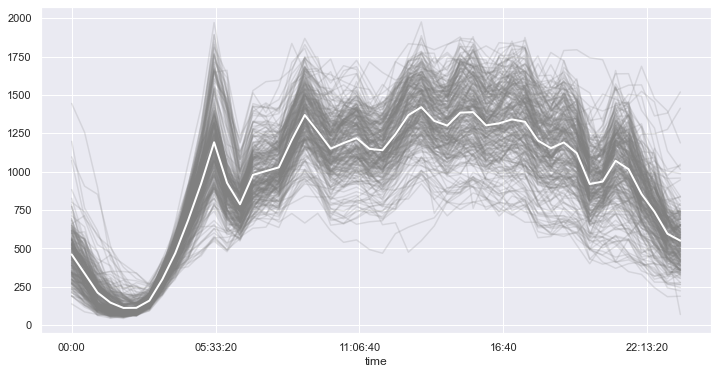

In [44]:
piv = (df.query("year==2019")
         .pivot_table(index='time', columns=['year', 'month', 'day'], values=['vehicles'], aggfunc='sum'))
ax = piv.plot(legend=False, alpha=0.2, color='grey', figsize=(12,6))

piv.mean(axis=1).plot(ax=ax, color='white', lw=2)

You can see from the data above that there is a strong daily trend and that there are cycles during the day that cause peaks and valleys.  We will investigate this more when we look at the wavelet analysis of the data.